# Aprenentatge supervisat (Classificació)

## Nivell 1
### Exercici 1 i 2
Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import svm
import xgboost as xgb


In [2]:
df = pd.read_csv('DelayedFlights.csv')

In [3]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


First steps 
- analyze the dataset:
- Remove useless columns and rows
- find relationsship between data
- create new colum with the target
 - Assing 1 if ArrDelay is greater than 0 otherwise 0
    


In [4]:
## we can start dropping unnamed: 0 because lack of information
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df['Delayed']= np.where(df['ArrDelay']>0,1,0)

In [6]:
df[['Delayed','ArrDelay']]

,Delayed,ArrDelay
0,0,-14.0
1,1,2.0
2,1,14.0
3,1,34.0
4,1,11.0
...,...,...
1936753,1,25.0
1936754,1,75.0
1936755,1,99.0
1936756,1,9.0


In [7]:
## check the relationship between diverted and  the target
df_check =df[['Diverted','ArrDelay']]
df_check[df_check['Diverted']==1]

,Diverted,ArrDelay
1280,1,NaN
1372,1,NaN
1776,1,NaN
1831,1,NaN
2244,1,NaN
...,...,...
1934369,1,NaN
1934921,1,NaN
1935596,1,NaN
1935716,1,NaN


When the value of diverted is 1  the value of arrDelay is null. that makes sense because diverted =1 means that the Flight does not follow the path scheduled.
we can remove all the rows with diverted =1 

In [8]:
df.drop(df[df.Diverted==1].index,inplace=True)

In [9]:
df.loc[df.Cancelled==1,['ArrDelay','Delayed']]

,ArrDelay,Delayed
1542406,NaN,0
1546593,NaN,0
1547161,NaN,0
1547178,NaN,0
1548271,NaN,0
...,...,...
1934590,NaN,0
1935491,NaN,0
1935651,NaN,0
1935876,NaN,0


we can see that all the flights that  cancelled is equal 1  there are not values for ArrDelay  therefore the value of Delayed will be 0 . Said that, there is no reason to use all the row that the flight was cancelled

In [10]:
df.drop(df[df.Cancelled==1].index,inplace=True)

we can remove the cancellation code column as well

In [11]:
df.drop('CancellationCode',axis=1,inplace=True)

In [12]:
d1 = df[['UniqueCarrier','Delayed']]

In [13]:
grouped =d1.groupby(['UniqueCarrier'])['Delayed'].mean().rename('Percentage').reset_index()

In [14]:
grouped['Percentage']=grouped['Percentage']*100

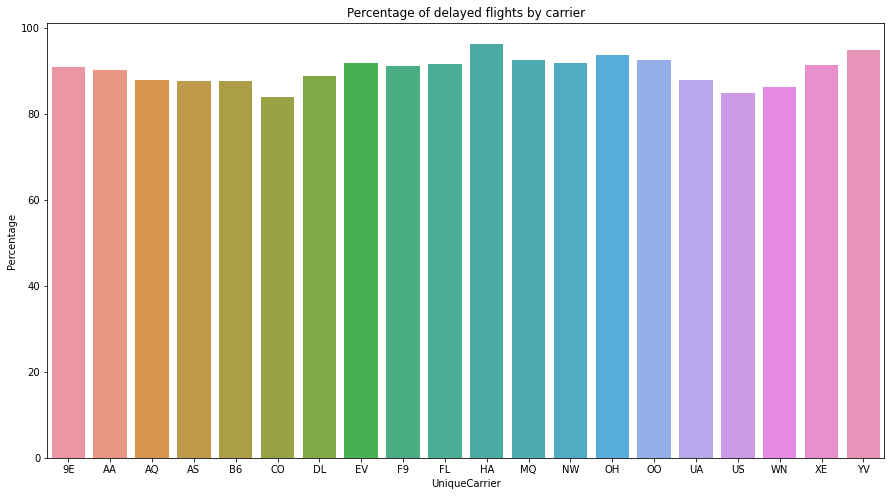

In [15]:

plt.figure(figsize=(15,8))
ax=sns.barplot(x='UniqueCarrier',y='Percentage',data=grouped).set_title('Percentage of delayed flights by carrier')

In the plot we can see, there is no strong variance in the diference of delayed flights  for each carries.Therefore, seems that is not giving important information due to the uniform distribution,so we remove the attribute

In [16]:
df.drop(['UniqueCarrier'],axis=1,inplace=True)


In [17]:
df.drop(['FlightNum'],axis=1,inplace=True)

In [18]:
df.drop([ 'TailNum','Origin', 'Dest','ArrDelay' ], axis=1, inplace=True)

In [19]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,SecurityDelay,680883,64.691286
1,NASDelay,680883,64.691286
2,WeatherDelay,680883,64.691286
3,CarrierDelay,680883,64.691286
4,LateAircraftDelay,680883,64.691286
5,Year,0,100.000000
6,Diverted,0,100.000000
7,Cancelled,0,100.000000
8,TaxiOut,0,100.000000
9,TaxiIn,0,100.000000


In [20]:
df.fillna(0,inplace=True)

### K-Nearest Neighbors 

In [21]:
df_sample=df.sample(500000)

In [22]:
X = df_sample.drop(['Delayed'],axis=1)

In [23]:
y = df_sample['Delayed']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [49]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
y_pred = classifier.predict(X_test)

In [36]:
def PrintActualPredicted(act,pred):
    df_print = pd.DataFrame({'Actual':act,'Predicted':pred})
    return(df_print)

In [52]:
PrintActualPredicted(y_test,y_pred)

,Actual,Predicted
1074590,1,1
1520304,1,1
705522,1,1
193527,1,0
1562773,1,1
...,...,...
1172874,1,1
1253044,1,1
1720109,0,0
1266083,1,1


#### Metrics


***Accuracy***

In [67]:
print('Classification accuracy is: ',metrics.accuracy_score(y_test,y_pred),'%')

Classification accuracy is:  0.93854 %


***Null accuracy***: accuracy that could be achieved by always predictin the most frequent class 

In [68]:
y_test.value_counts()

1    89471
0    10529
Name: Delayed, dtype: int64

In [72]:
y_test.mean()

0.89471

In [70]:
### percentage of zeros
1-y_test.mean()

0.10529

In [71]:
max(y_test.mean(),1-y_test.mean())

0.89471

we can check out if our set is unbalanced checking balanced accuracy

this mean that  a dum model that always predict 1 would be rigth 89% of the time  showing that accuracy is not that good as it's close to a dum model  

In [56]:
print(metrics.balanced_accuracy_score(y_test,y_pred))

0.7786562621477371


balanced accuracy gives diferent result meaning that is unbalanced

***Confusion matrix***

In [75]:
confusion= metrics.confusion_matrix(y_test,y_pred)
print(confusion)
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0]

[[ 6066  4463]
 [ 1683 87788]]


***Sensitivity*** When the actual value is positive, how often is the prediction correct?


In [73]:
print(metrics.recall_score(y_test,y_pred))

0.9811894356830705


***Specificity*** When the actual value is negative, how often is the prediction correct?

In [76]:
 specificity = TN / (TN+FP)
print(specificity)

0.5761230886124038


our classifier is:
 - Highly sensitive
 - not so specific

***False positive Rate*** 


In [77]:
print(1-specificity)

0.4238769113875962


***F1 Score***

In [79]:
metrics.f1_score(y_test,y_pred)

0.966179108748528

### Suport vector machine

In [126]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [127]:
y_pred = clf.predict(X_test)

### Metrics

***Accuracy***

In [128]:
print('Classification accuracy is: ',(metrics.accuracy_score(y_test,y_pred)*100),'%')

Classification accuracy is:  100.0 %


***Confusion matrix***

In [129]:
confusion_svm = metrics.confusion_matrix(y_test,y_pred)
print(confusion_svm)
TP_svm = confusion_svm[1,1]
TN_svm = confusion_svm[0,0]
FP_svm = confusion_svm[0,1]
FN_svm = confusion_svm[1,0]

[[10629     0]
 [    0 89371]]


***Sensitivity***


In [130]:
print(metrics.recall_score(y_test,y_pred))

1.0


***Specificity***

In [131]:
spec = TN_svm/(TN_svm+FP_svm)
print(spec)

1.0


***Precision***

In [132]:
print(metrics.precision_score(y_test,y_pred))

1.0


***F1 Score***

In [133]:
print(metrics.f1_score(y_test,y_pred))

1.0


### XGBoost

In [146]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [149]:
xgb_class =xgb.XGBClassifier(eval_metric='mlogloss',use_label_encoder =False)

In [150]:
xgb_class.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [151]:
y_pred=xgb_class.predict(X_test)

In [152]:
PrintActualPredicted(y_test,y_pred)

,Actual,Predicted
1518522,1,1
1021535,1,1
223093,0,0
402633,1,1
1260558,1,1
...,...,...
26823,1,1
412745,1,1
424943,1,1
1068779,1,1


### Metrics

***Accuracy***

In [153]:
print(metrics.accuracy_score(y_test,y_pred))

0.99203


***Confusion matrix***

In [154]:
confusion_xgb = metrics.confusion_matrix(y_test,y_pred)
print(confusion_xgb)

[[10044   585]
 [  212 89159]]


In [141]:
TP_xgb = confusion_xgb[1,1]
TN_xgb = confusion_xgb[0,0]
FP_xgb = confusion_xgb[0,1]
FN_xgb = confusion_xgb[1,0]

***Sensitivity***


In [142]:
print(metrics.recall_score(y_test,y_pred))

0.9976278658625282


***Specificity***

In [143]:
spec = TN_xgb/(TN_xgb+FP_xgb)
print(spec)

0.9449618966977138


***Precision***

In [144]:
print(metrics.precision_score(y_test,y_pred))

0.993481458370476


***F1 Score***

In [145]:
print(metrics.f1_score(y_test,y_pred))

0.9955503447505791


conclusion:
the best model without threat features is svm with 100% on the metrics.On the other hand KNN is the worst model in terms of metrics and time processing

## Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

### KNN 

In [22]:
params = {
    'n_neighbors':[1,2,4,8,16,32],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'leaf_size':[10,20,40,80],
    'p':[1,2,5]
}

In [23]:
params['n_neighbors']

[1, 2, 4, 8, 16, 32]

In [24]:
df_sample=df.sample(500000)

In [25]:
X=df_sample.drop(['Delayed'],axis=1)

In [26]:
y=df_sample['Delayed']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y,)

In [104]:
X_train.shape

(375000, 22)

In [106]:
y_train.shape

(375000,)

In [107]:
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (375000, 22) (375000,)
Testing set shape:  (125000, 22) (125000,)


In [108]:
## calculating  the accuracy of models with diferents  neighbors
acc_mean=[]
for i in params['n_neighbors']:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    yhat= knn.predict(X_test)
    acc_mean.append(metrics.accuracy_score(y_test,yhat))

In [109]:
acc_mean

[0.924184, 0.905928, 0.919144, 0.923144, 0.918648, 0.909448]

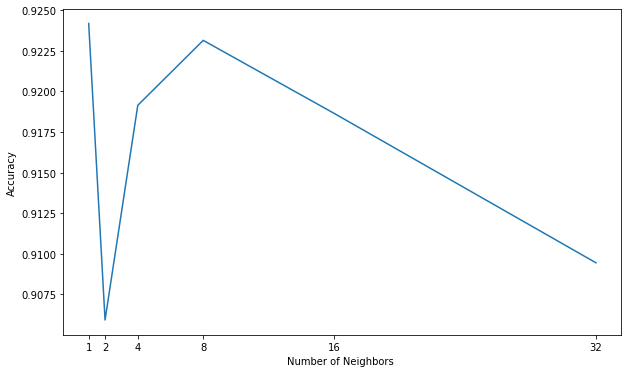

In [114]:

plt.figure(figsize = (10, 6))
plt.plot(params['n_neighbors'], acc_mean)
plt.xticks(params['n_neighbors'])
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [126]:
clss = KNeighborsClassifier(n_neighbors=8,weights=params['weights'][1],p=params['p'][0],algorithm=params['algorithm'][2])

In [127]:
clss.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=8, p=1,
                     weights='distance')

In [128]:
y_predict=clss.predict(X_test)

In [129]:
print('Accuracy')
print(metrics.accuracy_score(y_test,y_predict))
print('F1 score:\n',metrics.f1_score(y_test,y_predict))

Accuracy
0.930888
F1 score:
 0.962061227268136


the metrics are worst than default mode

### SVM

In [24]:
kernels = ['Polynomial', 'Sigmoid','Linear']
def getClassifier(kernel):
    
    if kernel=='Polynomial':
        return svm.SVC(kernel='poly',degree=5,gamma='auto')
   
    elif kernel == 'Sigmoid':
        return svm.SVC(kernel='sigmoid',gamma='auto')
    elif kernel == 'Linear':
        return svm.SVC(kernel='linear',gamma='auto')

In [ ]:
acc =[]
for i in kernels:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    svcclassifier = getClassifier(i)
    print('fitting the model')
    svcclassifier.fit(X_train,y_train)
    print('predicting new values')
    y_pred=svcclassifier.predict(X_test)
    print('Evaluation of',i,'kernel') 
    acc.append(metrics.accuracy_score(y_test,y_pred))
    print(metrics.classification_report(y_test,y_pred))

fitting the model
predicting new values
Evaluation of Polynomial kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10713
           1       1.00      1.00      1.00     89287

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000

fitting the model


 as we can see exept rbf kernel wich i did not compute due the extense comupting time , the other kernels  gives good results

### XGBoost

In [22]:
df_sample=df.sample(500000)

X = df_sample.drop(['Delayed'],axis=1)

y = df_sample['Delayed']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [28]:
xgbparams={
    'max_depth':[2,4,8,16,30],
    'subsample':[0.2,0.4,0.8,1],
    'n_estimators':[10,20,40,60,80],
    'learning_rate':[0.2,0.4,0.8,1]
}

In [27]:
train_acc=[]
test_acc=[]

model=xgb.XGBClassifier(eval_metric='mlogloss',use_label_encoder =False)
model.fit(X_train,y_train)

y_predict=model.predict(X_test)
y_train_predict=model.predict(X_train)
print('Training accuracy',metrics.accuracy_score(y_train,y_train_predict))
print('Test accuracy',metrics.accuracy_score(y_test,y_predict))

Training accuracy 0.995695
Test accuracy 0.9919


In [41]:

for k,v in xgbparams.items():
    if k=='max_depth':
        max_depth_train_acc=[]
        max_depth_test_acc=[]
        for value in v:
            print(k,value)
            model=xgb.XGBClassifier(max_depth=value,eval_metric='mlogloss',use_label_encoder =False)
            model.fit(X_train,y_train)
            y_predict=model.predict(X_test)
            y_train_predict=model.predict(X_train)
            train_ac=metrics.accuracy_score(y_train,y_train_predict)
            test_ac=metrics.accuracy_score(y_test,y_predict)
            print('Training accuracy',train_ac)
            max_depth_train_acc.append(train_ac)
            print('test accuracy',test_ac)
            max_depth_test_acc.append(test_ac)
            
    elif k=='subsample':
        subsample_train_acc=[]
        subsample_test_acc=[]
        for value in v:
            print(k,value)
            model=xgb.XGBClassifier(subsample=value,eval_metric='mlogloss',use_label_encoder =False)
            model.fit(X_train,y_train)
            y_predict=model.predict(X_test)
            y_train_predict=model.predict(X_train)
            train_ac=metrics.accuracy_score(y_train,y_train_predict)
            test_ac=metrics.accuracy_score(y_test,y_predict)
            print('Training accuracy',train_ac)
            subsample_train_acc.append(train_ac)
            print('test accuracy',test_ac)
            subsample_test_acc.append(test_ac)
    elif k == 'n_estimators':
        n_estimators_train_acc=[]
        n_estimators_test_acc=[]
        for value in v:
            print(k,value)
            model=xgb.XGBClassifier(n_estimators=value,eval_metric='mlogloss',use_label_encoder =False)
            model.fit(X_train,y_train)
            y_predict=model.predict(X_test)
            y_train_predict=model.predict(X_train)
            train_ac=metrics.accuracy_score(y_train,y_train_predict)
            test_ac=metrics.accuracy_score(y_test,y_predict)
            print('Training accuracy',train_ac)
            n_estimators_train_acc.append(train_ac)
            print('test accuracy',test_ac)
            n_estimators_test_acc.append(test_ac)
    elif k == 'learning_rate':
        learning_train_acc=[]
        learning_test_acc=[]
        for value in v:
            print(k,value)
            model=xgb.XGBClassifier(learning_rate=value,eval_metric='mlogloss',use_label_encoder =False)
            model.fit(X_train,y_train)
            y_predict=model.predict(X_test)
            y_train_predict=model.predict(X_train)
            train_ac=metrics.accuracy_score(y_train,y_train_predict)
            test_ac=metrics.accuracy_score(y_test,y_predict)
            print('Training accuracy',train_ac)
            learning_train_acc.append(train_ac)
            print('test accuracy',test_ac)
            learning_test_acc.append(test_ac)
            

max_depth 2
Training accuracy 0.953425
test accuracy 0.95364
max_depth 4
Training accuracy 0.985865
test accuracy 0.98412
max_depth 8
Training accuracy 0.9991575
test accuracy 0.99387
max_depth 16
Training accuracy 1.0
test accuracy 0.9952
max_depth 30
Training accuracy 1.0
test accuracy 0.9951
subsample 0.2
Training accuracy 0.99264
test accuracy 0.98988
subsample 0.4
Training accuracy 0.9941625
test accuracy 0.99121
subsample 0.8
Training accuracy 0.9955725
test accuracy 0.99193
subsample 1
Training accuracy 0.995695
test accuracy 0.9919
n_estimators 10
Training accuracy 0.9346925
test accuracy 0.93532
n_estimators 20
Training accuracy 0.94789
test accuracy 0.94737
n_estimators 40
Training accuracy 0.9810075
test accuracy 0.97903
n_estimators 60
Training accuracy 0.9897
test accuracy 0.98716
n_estimators 80
Training accuracy 0.993735
test accuracy 0.99032
learning_rate 0.2
Training accuracy 0.99237
test accuracy 0.98884
learning_rate 0.4
Training accuracy 0.9970775
test accuracy 0.99

In [62]:

def xgbplot(k,train,test):
        plt.figure(figsize = (10, 6))
        plt.plot(xgbparams[k],train,label='Train accuracy')
        plt.plot(xgbparams[k],test,label='test accuracy')
        plt.xticks(xgbparams[k])
        plt.xlabel('Number of {}'.format(k))
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

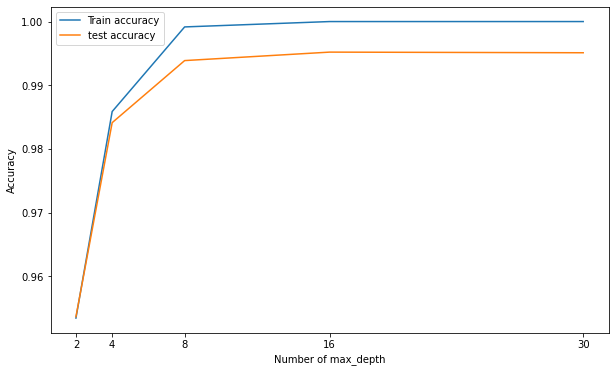

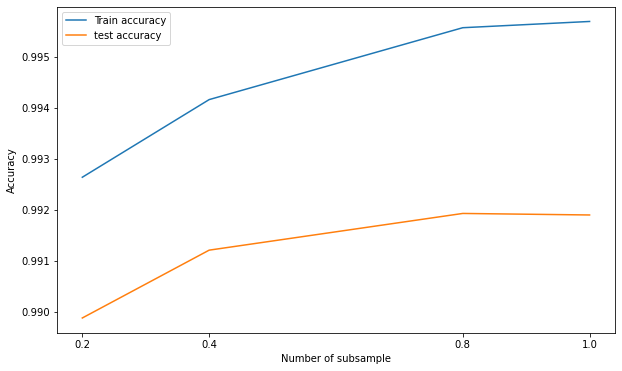

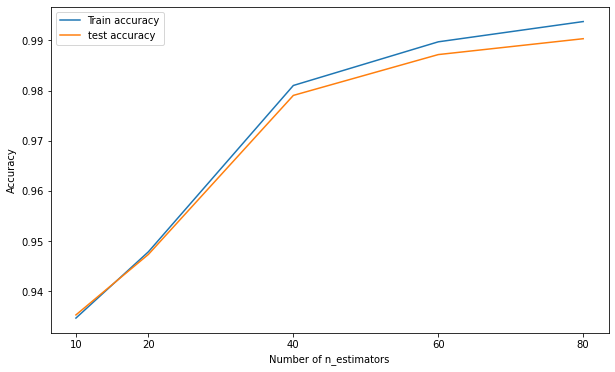

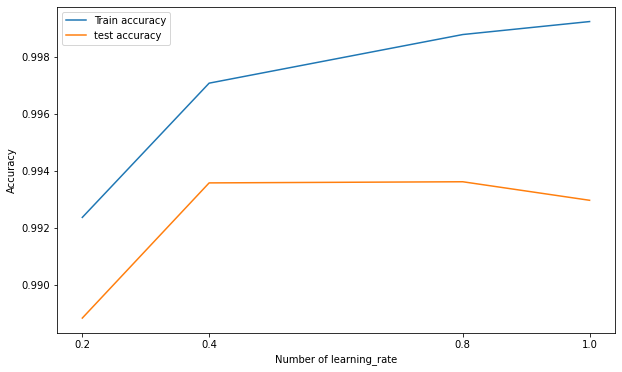

In [63]:
for k,v in xgbparams.items():
    if k =='max_depth':
        xgbplot(k,max_depth_train_acc,max_depth_test_acc)
    elif k =='subsample':
        xgbplot(k,subsample_train_acc,subsample_test_acc)
    elif k =='n_estimators':
        xgbplot(k,n_estimators_train_acc,n_estimators_test_acc)
    elif k =='learning_rate':
        xgbplot(k,learning_train_acc,learning_test_acc)
    